# MI 1 (2021): Exercise sheet 3

### Exercise H3.2: MLP Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

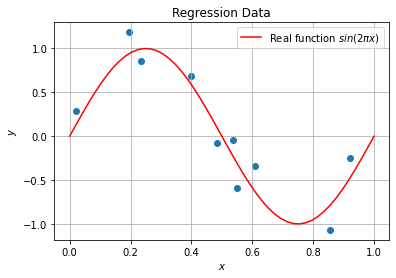

In [2]:
data = np.genfromtxt(fname='RegressionData.txt', delimiter=' ', dtype=np.float).T
x = data[0]
y = data[1]

plt.scatter(x, y)
plt.plot(np.linspace(0,1), np.sin(2*np.pi*np.linspace(0,1)), 'r-', label = "Real function $sin(2 \pi x)$")
plt.title("Regression Data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

In [3]:
def forward_propagation(w_matrix, x):
    ''' Implements forward pass for individual example x.
        Return:
            list of inputs and list of activities
    '''
    
    input_matrix = np.zeros(2) # h_i^v
    activity_matrix = np.zeros(2) # f^v(h_i^v) = s_i^v
    
    # input layer
    h0 = np.append(1, x) # adds intercept term
    s0 = h0 # f^0 = identity
    
    # hidden layer
    h1 = np.append(1, s0.dot(w_matrix[0].T))
    s1 = np.append(1, np.tanh(h1[1:])) # f^1 = tanh (don't apply in bias term)
    
    # output layer
    h2 = s1.dot(w_matrix[1].T)
    s2 = h2 # f^2 = identity
    
    input_matrix = [h0, h1, h2]
    activity_matrix = [s0, s1, s2]
    
    return (input_matrix, activity_matrix)
        
def backpropagation(inputs, w_matrix):
    ''' Implements backrpopagation taking list of total inputs for a single example.
        Return:
            list of local errors
    '''
    # local error of output layer
    delta2 = np.array([1])
    
    # local error of hidden layer
    delta1 = np.zeros_like(inputs[1])
    delta1[0] = delta2*w_matrix[1][0,0]
    delta1[1:] = (1 - np.tanh(inputs[1][1:])**2)*delta2*w_matrix[1][0,1:]

    deltas = [delta1, delta2]
    
    return deltas
    
def MSE(y, output):
    ''' Implements Mean Square Error (MSE)'''
    return 1/2*(y - output)**2

In [12]:
# Hyperparameters 
N0 = 1
N1 = 3
N2 = 1
epoch_max = 3000
eta = .5
tolerance = 10e-6

# Weights initialization randomly from uniform distribution in [-0.5,0.5]
w10 = np.random.rand(N1,N0+1) - .5
w21 = np.random.rand(N2,N1+1) - .5
W = [w10, w21]

# Stores training (empirical) error collected at each training epoch
errors = []

# Trainning
for ep in range(epoch_max):
    
    # Initilizes gradients and epoch errors to zero
    gradients = [np.zeros_like(w10), np.zeros_like(w21)]
    error_epoch = 0
    
    # Loop over training examples
    for i in range(len(x)):
        
        # Forward pass
        inputs, activities = forward_propagation(W, x[i])
        output = activities[-1]
        error_epoch += MSE(y[i], output)
        
        # Backpropagation
        deltas = backpropagation(inputs, W)

        # Updates gradients
        gradients[0] += (output - y[i])*np.tensordot(deltas[0][1:], activities[0], axes = 0)
        gradients[1] += (output - y[i])*deltas[1]*activities[1]
        
    gradients[0] /= len(x)
    gradients[1] /= len(x)
    
    # Updates weights 
    w10 -= eta*gradients[0]
    w21 -= eta*gradients[1]
    
    # Stores epoch error
    errors.append(error_epoch/len(x))
    
    # Checks convergence criterion
    if ep != 0:
        relative_error = abs(errors[ep] - errors[ep-1])/error_epoch
        if relative_error <= tolerance:
            print(f"Convegence reached at epoch {ep}!")
            break

# At the end of the training algorithm, W contains the optimal weights.

Convegence reached at epoch 1468!


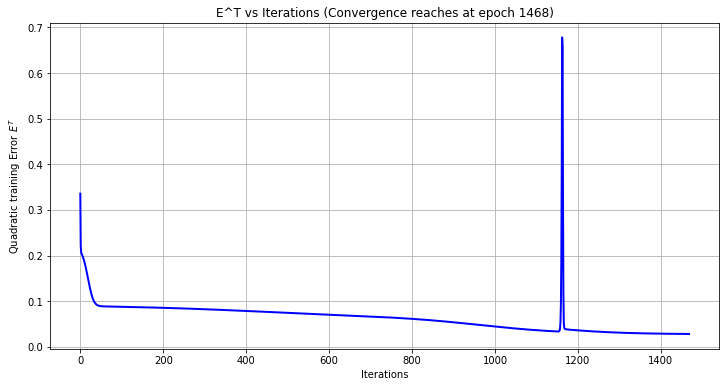

In [13]:
plt.figure(figsize = (12,6))

plt.plot(errors, 'b-', lw = 2)

plt.xlabel("Iterations")
plt.ylabel("Quadratic training Error $E^T$")
plt.title(f"E^T vs Iterations (Convergence reaches at epoch {ep})")
plt.grid()
plt.show()

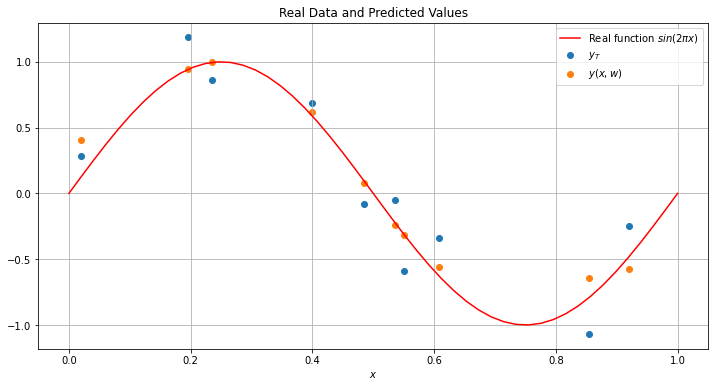

In [17]:
# Output calculated from MLP with optimal weigths 
outputs = [forward_propagation(W, ex)[1][-1] for ex in x]

plt.figure(figsize = (12,6))
plt.scatter(x, y, label = "$y_T$")
plt.scatter(x, outputs, label = "$y(x, w)$")
plt.plot(np.linspace(0,1), np.sin(2*np.pi*np.linspace(0,1)), 'r-', label = "Real function $sin(2 \pi x)$")
plt.title("Real Data and Predicted Values")
plt.xlabel("$x$")
plt.legend()
plt.grid()
plt.show()